# Plotting Thrust Distribution with Event Selections

In [25]:
# general
import os
import matplotlib.pyplot as plt
import numpy as np

# custom
from aleph_to_numpy import aleph_to_numpy 

In [26]:
aleph_path = '/Users/anthonybadea/Documents/ALEPH/ALEPH'
data = aleph_to_numpy(os.path.join(aleph_path, 'LEP1Data1994_recons_aftercut-MERGED.root'))
mc = aleph_to_numpy(os.path.join(aleph_path, 'alephMCRecoAfterCutPaths_1994.root'))

for key,val in data.items():
    print(f"{key} of size {val.shape}")
for key,val in mc.items():
    print(f"{key} of size {val.shape}")

data_thrust of size (1365440,)
data_passselection of size (1365440,)
truthWHES_thrust of size (771597,)
truthWHES_passselection of size (771597,)
truthWHES_eventweight of size (771597,)
truthWOHES_thrust of size (973769,)
truthWOHES_passselection of size (973769,)
truthWOHES_eventweight of size (973769,)
reco_passselection of size (771597,)
reco_thrust of size (771597,)
reco_eventweight of size (771597,)


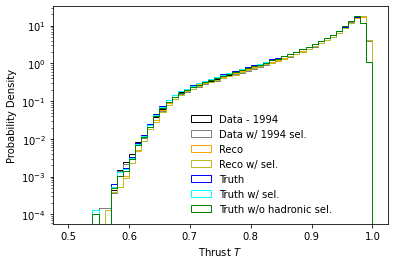

In [27]:
# compute the distributions to determine the bin-by-bin corrections
bins = np.linspace(0.5, 1, 51)
density = True

opts = {'bins': bins, 'histtype': 'step', 'density': density}

plt.hist(data['data_thrust'], color='black', label='Data - 1994', **opts)
plt.hist(data['data_thrust'][data['data_passselection']], color='gray', label='Data w/ 1994 sel.', **opts)

plt.hist(mc['reco_thrust'], color='orange', label='Reco', **opts)
simhist = plt.hist(mc['reco_thrust'][mc['reco_passselection']], color='tab:olive', label='Reco w/ sel.', **opts)[0]

plt.hist(mc['truthWHES_thrust'], color='blue', label='Truth', **opts)
genhist = plt.hist(mc['truthWHES_thrust'][mc['truthWHES_passselection']], color='cyan', label='Truth w/ sel.', **opts)[0]
genbhist = plt.hist(mc['truthWOHES_thrust'], color='green', label='Truth w/o hadronic sel.', **opts)[0]

plt.yscale('log')

#plt.ylim(10**-5.5, 1)

plt.xlabel(r'Thrust $T$')
plt.ylabel('Probability Density')

plt.legend(loc=(0.4, 0.025), frameon=False)

plt.savefig('../plots/ThrustDistributions.pdf', bbox_inches='tight')
plt.show()